In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import seaborn as sns
from config import geoapify_key
import os
# blah blah blah

In [7]:
# geoapify_key

In [10]:
# Our CSV file downloaded and put into a dataframe
uber_df = pd.read_csv('input/UberDataset.csv')
uber_df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [11]:
#Look at how many non null rows we have to work with
uber_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [12]:
# Cleaning data

# filling null purpose
uber_df["PURPOSE"] = uber_df["PURPOSE"].fillna("Miscellaneous")

# getting rid of null cells
uber_df.dropna(inplace = True)

# replacing mispelled values
uber_df = uber_df.replace({"START":{"R?walpindi":"Rawalpindi", "Kar?chi":"Karachi"}})
uber_df = uber_df.replace({"STOP":{"R?walpindi":"Rawalpindi", "Kar?chi":"Karachi"}})

uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Miscellaneous
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [13]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [14]:
uber_df.to_csv("output/cleaned_UberDataset.csv")

In [16]:
# Data Exploration:

In [ ]:
bins_variable = [0,5,10,15,20,25,30,50,100,150, 250]

Text(0, 0.5, 'Number of Rides')

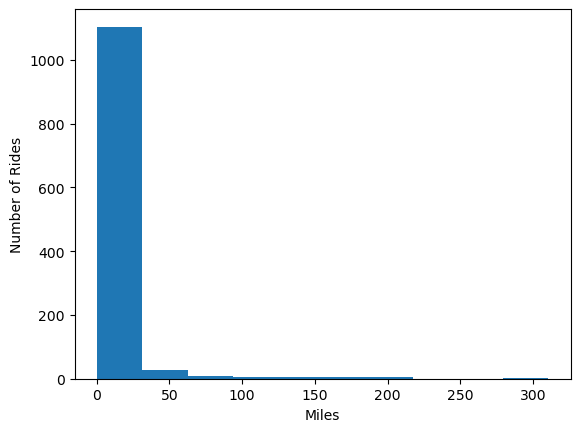

In [21]:
plt.hist(uber_df['MILES'])
plt.xlabel('Miles')
plt.ylabel('Number of Rides')

In [17]:
# change bins, label the axes...

In [22]:
bins_variable = [0,5,10,15,20,25,30,50,100,150, 250]

Text(0, 0.5, 'Number of Rides')

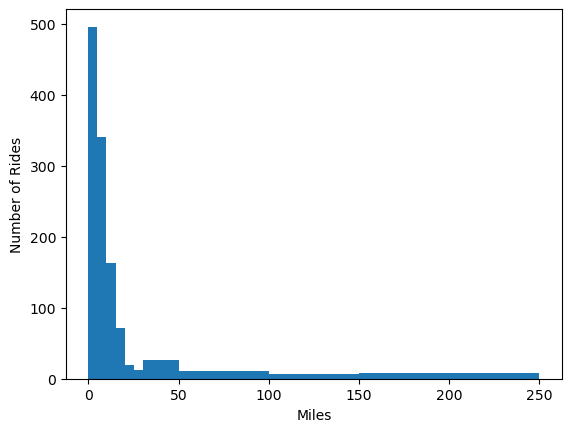

In [23]:
plt.hist(uber_df['MILES'], bins=bins_variable)
plt.xlabel('Miles')
plt.ylabel('Number of Rides')

In [26]:
bins_variable = [0,5,10,15,20,25,30,50,100,150, 250, 390]

Text(0, 0.5, 'Number of Rides')

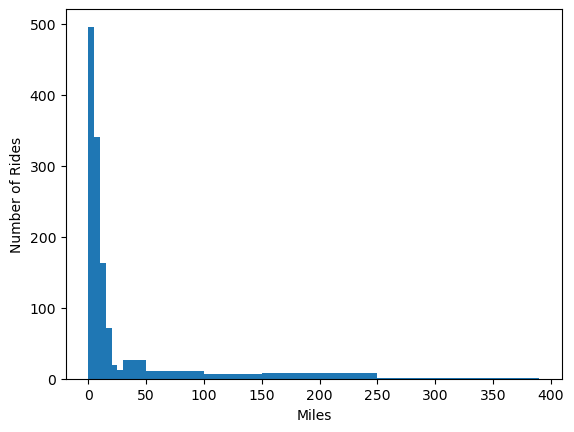

In [27]:
plt.hist(uber_df['MILES'], bins=bins_variable)
plt.xlabel('Miles')
plt.ylabel('Number of Rides')

In [28]:
# It's heavily right skewed.

In [30]:
# pie charts, line regression?, box and whisker? strip plot?

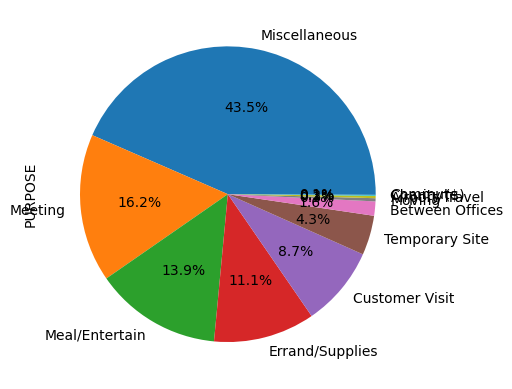

In [35]:
purpose_data = uber_df['PURPOSE'].value_counts()
purpose_data.plot.pie(autopct="%1.1f%%")
plt.show()